<div style="text-align:center;">
    <b style="font-size:45px; color:DarkCyan">Visualizing Data Assignment</b><br>
    <b style="font-size:20px;">Kalyan Kola Cahill - C16357813</b>
</div>

In [21]:
library(readxl)
library(dplyr)
library (installr)
library(repr)
library(ggplot2)
library(scales)

<p style="font-family: Lucida Grande; font-size: 20px;">To begin with, the three gathered datasets are read in, either as a CSV or an XLSL file depending on the available type. These three datasets are described in detail in the included PDF report. Following this, a number of the 
feature names are changed, both for ease of understanding, and to ensure the names are identical across datasets
for merging.</p>

In [22]:
free_rank <- read_excel("../Data/Freedom_ranking.xlsx", sheet = 3)
happ_val <- read_excel("../Data/happiness_rating.xlsx")
gdp_val <- read.csv(file = '../Data/GDP.csv')

colnames(free_rank)[1] <- "Country_Code"
colnames(free_rank)[3] <- "Country_Name"
colnames(free_rank)[4] <- "Year"
colnames(free_rank)[6] <- "Political_Rights"
colnames(free_rank)[7] <- "Civil_Liberties"
colnames(free_rank)[8] <- "Freedom_Rating"

colnames(happ_val)[2] <- "Country_Name"
colnames(happ_val)[3] <- "Year"

colnames(gdp_val)[1] <- "Country_Name"
colnames(gdp_val)[2] <- "Country_Code"
colnames(gdp_val)[3] <- "Year"
colnames(gdp_val)[4] <- "GDP_Value"

<p style="font-family: Lucida Grande; font-size: 20px;">Following this, we can inspect the dataframe intially using
the head() command. This allows for some preliminary data analysis, observing the common features that will be used for merging, as well as noting any of the useful features that can be used for the final dataset. The originally selected columns are as follows: CCode, Country Name, Year, Political Rights, Civil Liberties, Freedom Rating,
GDP Value, Social Support, Healthy Life Expectancy at Birth, Freedom to Make Life Choices, Perceptions of Corruption, and Confidence in National Government. What these features represent is explained in full in the previously mentioned report.</p>

In [23]:
head(free_rank)
head(happ_val)
head(gdp_val)

Country_Code,ccode,Country_Name,Year,edition,Political_Rights,Civil_Liberties,Freedom_Rating,inverse_pr,inverse_cl,mean,inverse_mean,sum,inverse_sum,min,max,inverse_min,inverse_max
AFG,700,Afghanistan,1972,Jan.-Feb. 1973,4,5,PF,4,3,4.5,3.5,9,7,4,5,3,4
AFG,700,Afghanistan,1973,Jan.-Feb. 1974,7,6,NF,1,2,6.5,1.5,13,3,6,7,1,2
AFG,700,Afghanistan,1974,Jan.-Feb. 1975,7,6,NF,1,2,6.5,1.5,13,3,6,7,1,2
AFG,700,Afghanistan,1975,Jan.-Feb. 1976,7,6,NF,1,2,6.5,1.5,13,3,6,7,1,2
AFG,700,Afghanistan,1976,Jan.-Feb. 1977,7,6,NF,1,2,6.5,1.5,13,3,6,7,1,2
AFG,700,Afghanistan,1977,1978,6,6,NF,2,2,6.0,2.0,12,4,6,6,2,2


WP5 Country,Country_Name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
Afghanistan,Afghanistan,2008,3.723590,7.197130,0.4506623,47.55044,0.7181143,0.1830619,0.8816863,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,Afghanistan,2009,4.401778,7.362664,0.5523084,47.85967,0.6788964,0.2046332,0.8500354,...,NA,NA,0.4419058,0.2863153,NA,NA,NA,NA,NA,NA
Afghanistan,Afghanistan,2010,4.758381,7.416260,0.5390752,48.15951,0.6001272,0.1385288,0.7067661,...,NA,NA,0.3273182,0.2758327,NA,NA,NA,NA,NA,NA
Afghanistan,Afghanistan,2011,3.831719,7.445761,0.5211036,48.45116,0.4959014,0.1761079,0.7311085,...,NA,NA,0.3367642,NA,NA,NA,NA,NA,NA,NA
Afghanistan,Afghanistan,2012,3.782938,7.549241,0.5206367,48.73835,0.5309350,0.2477128,0.7756198,...,NA,NA,0.3445396,NA,NA,NA,NA,NA,NA,NA
Afghanistan,Afghanistan,2013,3.572100,7.536999,0.4835519,49.02309,0.5779554,0.0751857,0.8232041,...,NA,NA,0.3043685,NA,NA,NA,NA,NA,NA,NA


Country_Name,Country_Code,Year,GDP_Value
Arab World,ARB,1968,25760683041
Arab World,ARB,1969,28434203615
Arab World,ARB,1970,31385499664
Arab World,ARB,1971,36426909888
Arab World,ARB,1972,43316056615
Arab World,ARB,1973,55018394946


<p style="font-family: Lucida Grande; font-size: 20px;">The datasets are merged using the common feature columns,
Country Name and Year, to create a single large dataframe encompassing all the dataframe features.</p>

In [24]:
merge_df1 = merge(free_rank, gdp_val, by=c("Country_Name", "Year"))
merge_df2 = merge(merge_df1, happ_val, by=c("Country_Name", "Year"))

<p style="font-family: Lucida Grande; font-size: 20px;">Now that the datasets have been compiled together, we can begin analysing for any data quality issues. The first an foremost issue to be considered is potential data loss during the merge.<br><br> Since the index of the dataframes are not unique, in that the Country Name and Country Code features repeat for each related Year in the dataset, using nrows to examine for data loss is insufficient. Instead, we can compare the number of unique values in each of the three datasets against the number of unique values in the final merged set.</p>

In [25]:
# using length() to find the number of unique() rows in each dataframe's Country Name column
cat("Free_rank Dataframe Unique Values: ", length(unique(free_rank$'Country_Name')))
cat("\nGDP_val Dataframe Unique Values: ", length(unique(gdp_val$'Country_Name')))
cat("\nHapp_val Dataframe Unique Values: ", length(unique(happ_val$'Country_Name')))


# using length() to find the number of unique() rows in the final dataset's Country Name column
cat("\n\nFinal Merged Set Unique Values: ", length(unique(merge_df2$'Country_Name')))

Free_rank Dataframe Unique Values:  204
GDP_val Dataframe Unique Values:  256
Happ_val Dataframe Unique Values:  164

Final Merged Set Unique Values:  142

<p style="font-family: Lucida Grande; font-size: 20px;">We note a drop in the unique row count after the merge, however this loss is expected as the initial unique counts for each dataset show the differing number of unique values for each of the three datasets. Going further, we can ensure that no <b>additional</b> unforeseen data loss is occuring by comparing the number of unique Country Name values against the common Country Name values pre-merge. <br><br>
1.) We begin by comparing the unique value count of the first merged set against the common values between the first two dataframes. By inspecting this comparison, it was noted that the 'Country Tag' variable was causing an additional 63 rows to be lost, and as such it was removed from the final set.<br><br>
2.) After this, we compare the unique value count of the second merged set against the common values between the first merged set and the third dataframe. Inpsecting these values we note that there <b>is</b> in fact additional data being lost, as we are losing a single country post merge.</p>

In [26]:
# 1.) Using the intersect() function to calculate the common values between the first
#     two datasets. This is then compared against the unique value count of the first merge.
cat("First Merged Set Unique Values: ", length(unique(merge_df1$'Country_Name')))
common <- intersect(free_rank$'Country_Name', gdp_val$'Country_Name')  
cat("\nPre-merge Common Value Count: ", length(common))

# 2.) Using the intersect() function to calculate the common values between the first 
#     merged dataset and the third dataset. This is then compared against the unique value
#     count of the second merge.
cat("\n\nSecond Merged Set Unique Values: ", length(unique(merge_df2$'Country_Name')))
common <- intersect(merge_df1$'Country_Name', happ_val$'Country_Name')
cat("\nPre-merge Common Value Count: ", length(common))


First Merged Set Unique Values:  168
Pre-merge Common Value Count:  168

Second Merged Set Unique Values:  142
Pre-merge Common Value Count:  143

<p style="font-family: Lucida Grande; font-size: 20px;">To analyse <b>why</b> this particular Country Name is being lost during the merge, we must identify it for inspection. Using the %in% command lets us view the Country Name which appears in 'common' but not in the merged dataframe.<br><br>
After finding out the Country Name being lost (Libya), we can using the filter() function to view the Libyan rows in both the third dataset as well as the first merged dataframe. By analysing the data, we find that the reason for this particular country being lost is simply due to a gap between the datasets. In the initial merged set, there is Libyan data from 1990-2012, however in the third dataset there is only data for Libya for 2012, 2015, and 2016. We can therefore safely disregard this data loss, as it is resulting simply from a lack of data for three specific years in Libya.</p>

In [27]:
# Using the %in% operator to view the Country Names present in common
# but not present in the second merged dataset.
cat("Missing Country Name: ", common[!(common %in% merge_df2$'Country_Name')])


# Using the filter() function to return only data from each dataset where
# the Country name is 'Libya'.
miss_df <- filter(happ_val, happ_val$'Country_Name' == 'Libya')
libya_df <- filter(merge_df1, merge_df1$'Country_Name' == 'Libya')

# Print the Year values for each of the filtered datasets
cat("\nThird Dataset Libyan Years: ", miss_df$Year)
cat("\nMerged Dataset Libyan Years: ", libya_df$Year)

Missing Country Name:  Libya
Third Dataset Libyan Years:  2012 2015 2016
Merged Dataset Libyan Years:  1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011

<p style="font-family: Lucida Grande; font-size: 20px;">Now that we have ensured that no data loss is occuring, we can create our final dataset by specifying the features we wish to include. Printed Below is the dataframe head, along with a quick summary of the feature datatypes.</p>

In [28]:
final_df <- merge_df2[,c("Country_Name", "Year", "Political_Rights", "Civil_Liberties", 
                        "Freedom_Rating", "GDP_Value", "Social support", "Healthy life expectancy at birth", 
                        "Freedom to make life choices", "Perceptions of corruption", "Confidence in national government")]
colnames(final_df)[7] <- "Social_Support"
colnames(final_df)[8] <- "Life_Expectancy"
colnames(final_df)[9] <- "Freedom_Life_Choices"
colnames(final_df)[10] <- "Perception_of_Corruption"
colnames(final_df)[11] <- "Confidence_in_Government"

head(final_df)
print(str(final_df))

Country_Name,Year,Political_Rights,Civil_Liberties,Freedom_Rating,GDP_Value,Social_Support,Life_Expectancy,Freedom_Life_Choices,Perception_of_Corruption,Confidence_in_Government
Afghanistan,2008,5,6,NF,10190529882,0.4506623,47.55044,0.7181143,0.8816863,0.6120721
Afghanistan,2009,6,6,NF,12486943506,0.5523084,47.85967,0.6788964,0.8500354,0.6115452
Afghanistan,2010,6,6,NF,15936800636,0.5390752,48.15951,0.6001272,0.7067661,0.2993574
Afghanistan,2011,6,6,NF,17930239400,0.5211036,48.45116,0.4959014,0.7311085,0.3073857
Afghanistan,2012,6,6,NF,20536542737,0.5206367,48.73835,0.5309350,0.7756198,0.4354402
Afghanistan,2013,6,6,NF,20046334304,0.4835519,49.02309,0.5779554,0.8232041,0.4828473


'data.frame':	1245 obs. of  11 variables:
 $ Country_Name            : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                    : num  2008 2009 2010 2011 2012 ...
 $ Political_Rights        : num  5 6 6 6 6 6 6 6 6 3 ...
 $ Civil_Liberties         : num  6 6 6 6 6 6 6 6 6 3 ...
 $ Freedom_Rating          : chr  "NF" "NF" "NF" "NF" ...
 $ GDP_Value               : num  1.02e+10 1.25e+10 1.59e+10 1.79e+10 2.05e+10 ...
 $ Social_Support          : num  0.451 0.552 0.539 0.521 0.521 ...
 $ Life_Expectancy         : num  47.6 47.9 48.2 48.5 48.7 ...
 $ Freedom_Life_Choices    : num  0.718 0.679 0.6 0.496 0.531 ...
 $ Perception_of_Corruption: num  0.882 0.85 0.707 0.731 0.776 ...
 $ Confidence_in_Government: num  0.612 0.612 0.299 0.307 0.435 ...
NULL


<p style="font-family: Lucida Grande; font-size: 20px;">When identifying missing values, a simple is.na(dataframe) command could be used, however to go more indepth in locating the missing values a for loop was created which will calculate the missing values for each feature in our dataframe.<br><br>
Following this, a new dataframe is created containing the names of all Countries with rows containing missing values.</p>

In [29]:
miss_vals = c()
for (i in colnames(final_df)){
  miss_vals[i] <- sum(is.na(final_df[i]))
}

miss_vals

miss_names <- unique(final_df[rowSums(is.na(final_df)) > 0,]$'Country_Name')
miss_names

# print index of missing value locations
# for (x in colnames(final_df)) {
#    gg <- which(is.na(final_df[[x]]))
#    cat("\nColumn", x, gg)
# }

Country_Name                     Year         Political_Rights 
                       0                        0                        2 
         Civil_Liberties           Freedom_Rating                GDP_Value 
                       2                        2                        0 
          Social_Support          Life_Expectancy     Freedom_Life_Choices 
                      12                        0                       26 
Perception_of_Corruption Confidence_in_Government 
                      70                      164

[1] "Albania"              "Algeria"              "Bahrain"             
 [4] "Belarus"              "Burundi"              "Cambodia"            
 [7] "Canada"               "China"                "Croatia"             
[10] "Cuba"                 "Djibouti"             "Ethiopia"            
[13] "Iraq"                 "Jordan"               "Kosovo"              
[16] "Kuwait"               "Lebanon"              "Madagascar"          
[19] "Malta"                "Montenegro"           "Morocco"             
[22] "Myanmar"              "Oman"                 "Qatar"               
[25] "Rwanda"               "Saudi Arabia"         "Serbia"              
[28] "Singapore"            "South Africa"         "Sudan"               
[31] "Sweden"               "Tajikistan"           "Tunisia"             
[34] "Turkey"               "Turkmenistan"         "United Arab Emirates"
[37] "United States"        "Uzbekistan"           "Vietnam"

<p style="font-family: Lucida Grande; font-size: 20px;">A Complete Case is applied to the dataframe to remove any rows with missing values.</p>

In [30]:
# remove rows with missing values (except 'Confidence in national government')
cleaned_df <- final_df[complete.cases(final_df[ , 1:11]), ]
cat("Remaining Missing Values: ", sum(is.na(cleaned_df)))

Remaining Missing Values:  0

<p style="font-family: Lucida Grande; font-size: 20px;">Below a number of simple graphs are generated to show the distribution of the data across each feature. We can note that there are no harmful outliers present in any of the features, as all values lie between the ranges outlined in the report.</p>

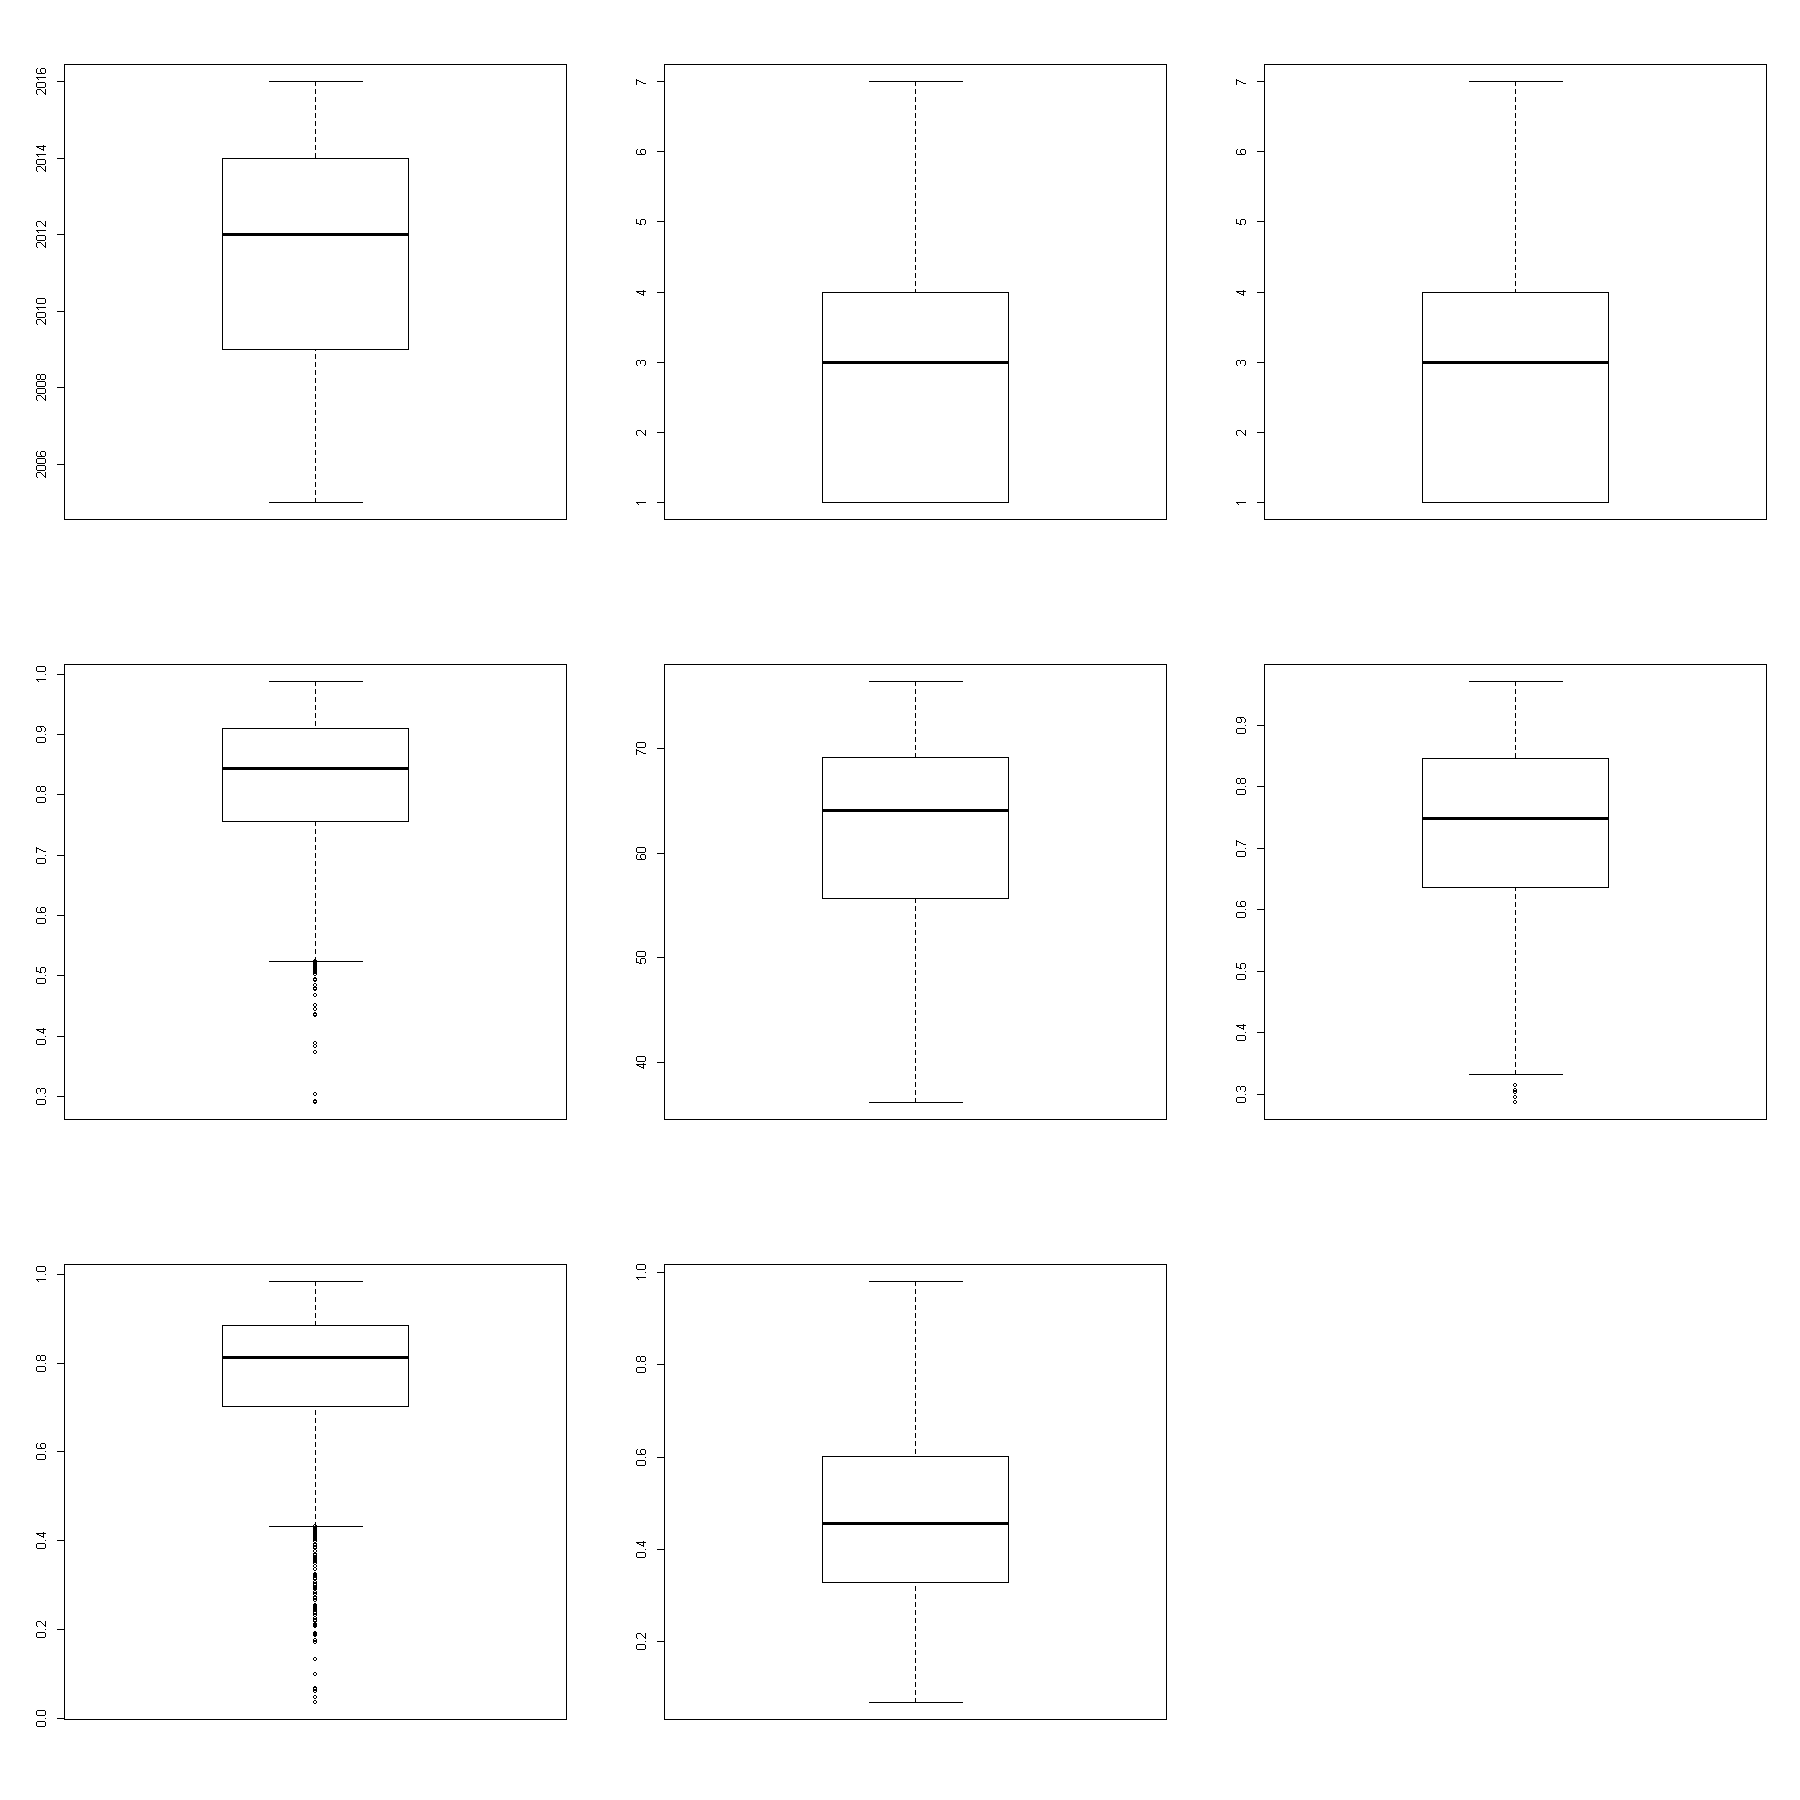

In [31]:
par(mfrow=c(3,3))
boxplot(cleaned_df$Year)
boxplot(cleaned_df$'Political_Rights')
boxplot(cleaned_df$'Civil_Liberties')
boxplot(cleaned_df$'Social_Support')
boxplot(cleaned_df$'Life_Expectancy')
boxplot(cleaned_df$'Freedom_Life_Choice')
boxplot(cleaned_df$'Perception_of_Corruption')
boxplot(cleaned_df$'Confidence_in_Government')

<p style="font-family: Lucida Grande; font-size: 20px;">Below we plot each of the variables against each other to analyse for any initial insights. From this plot, we can already note:
<ul style="list-style-type:circle">
    <li><b>Positive Correlation:</b></li>
    <li>Political Rights - Civil Liberties</li>
    <li>Social Support - Life Expectancy</li>
    <li>Social Support - Freedom to Make Life Choices</li>
    <li>Freedom to Make Life Choices - Life Expectancy</li>
    <li>Freedom to Make Life Choices - Confidence in Government</li>
    <li><b>Negative Correlation:</b></li>
    <li>Freedom to Make Life Choices - Perception of Corruption</li>
    <li>Perception of Corruption - Confidence in Government</li><p>

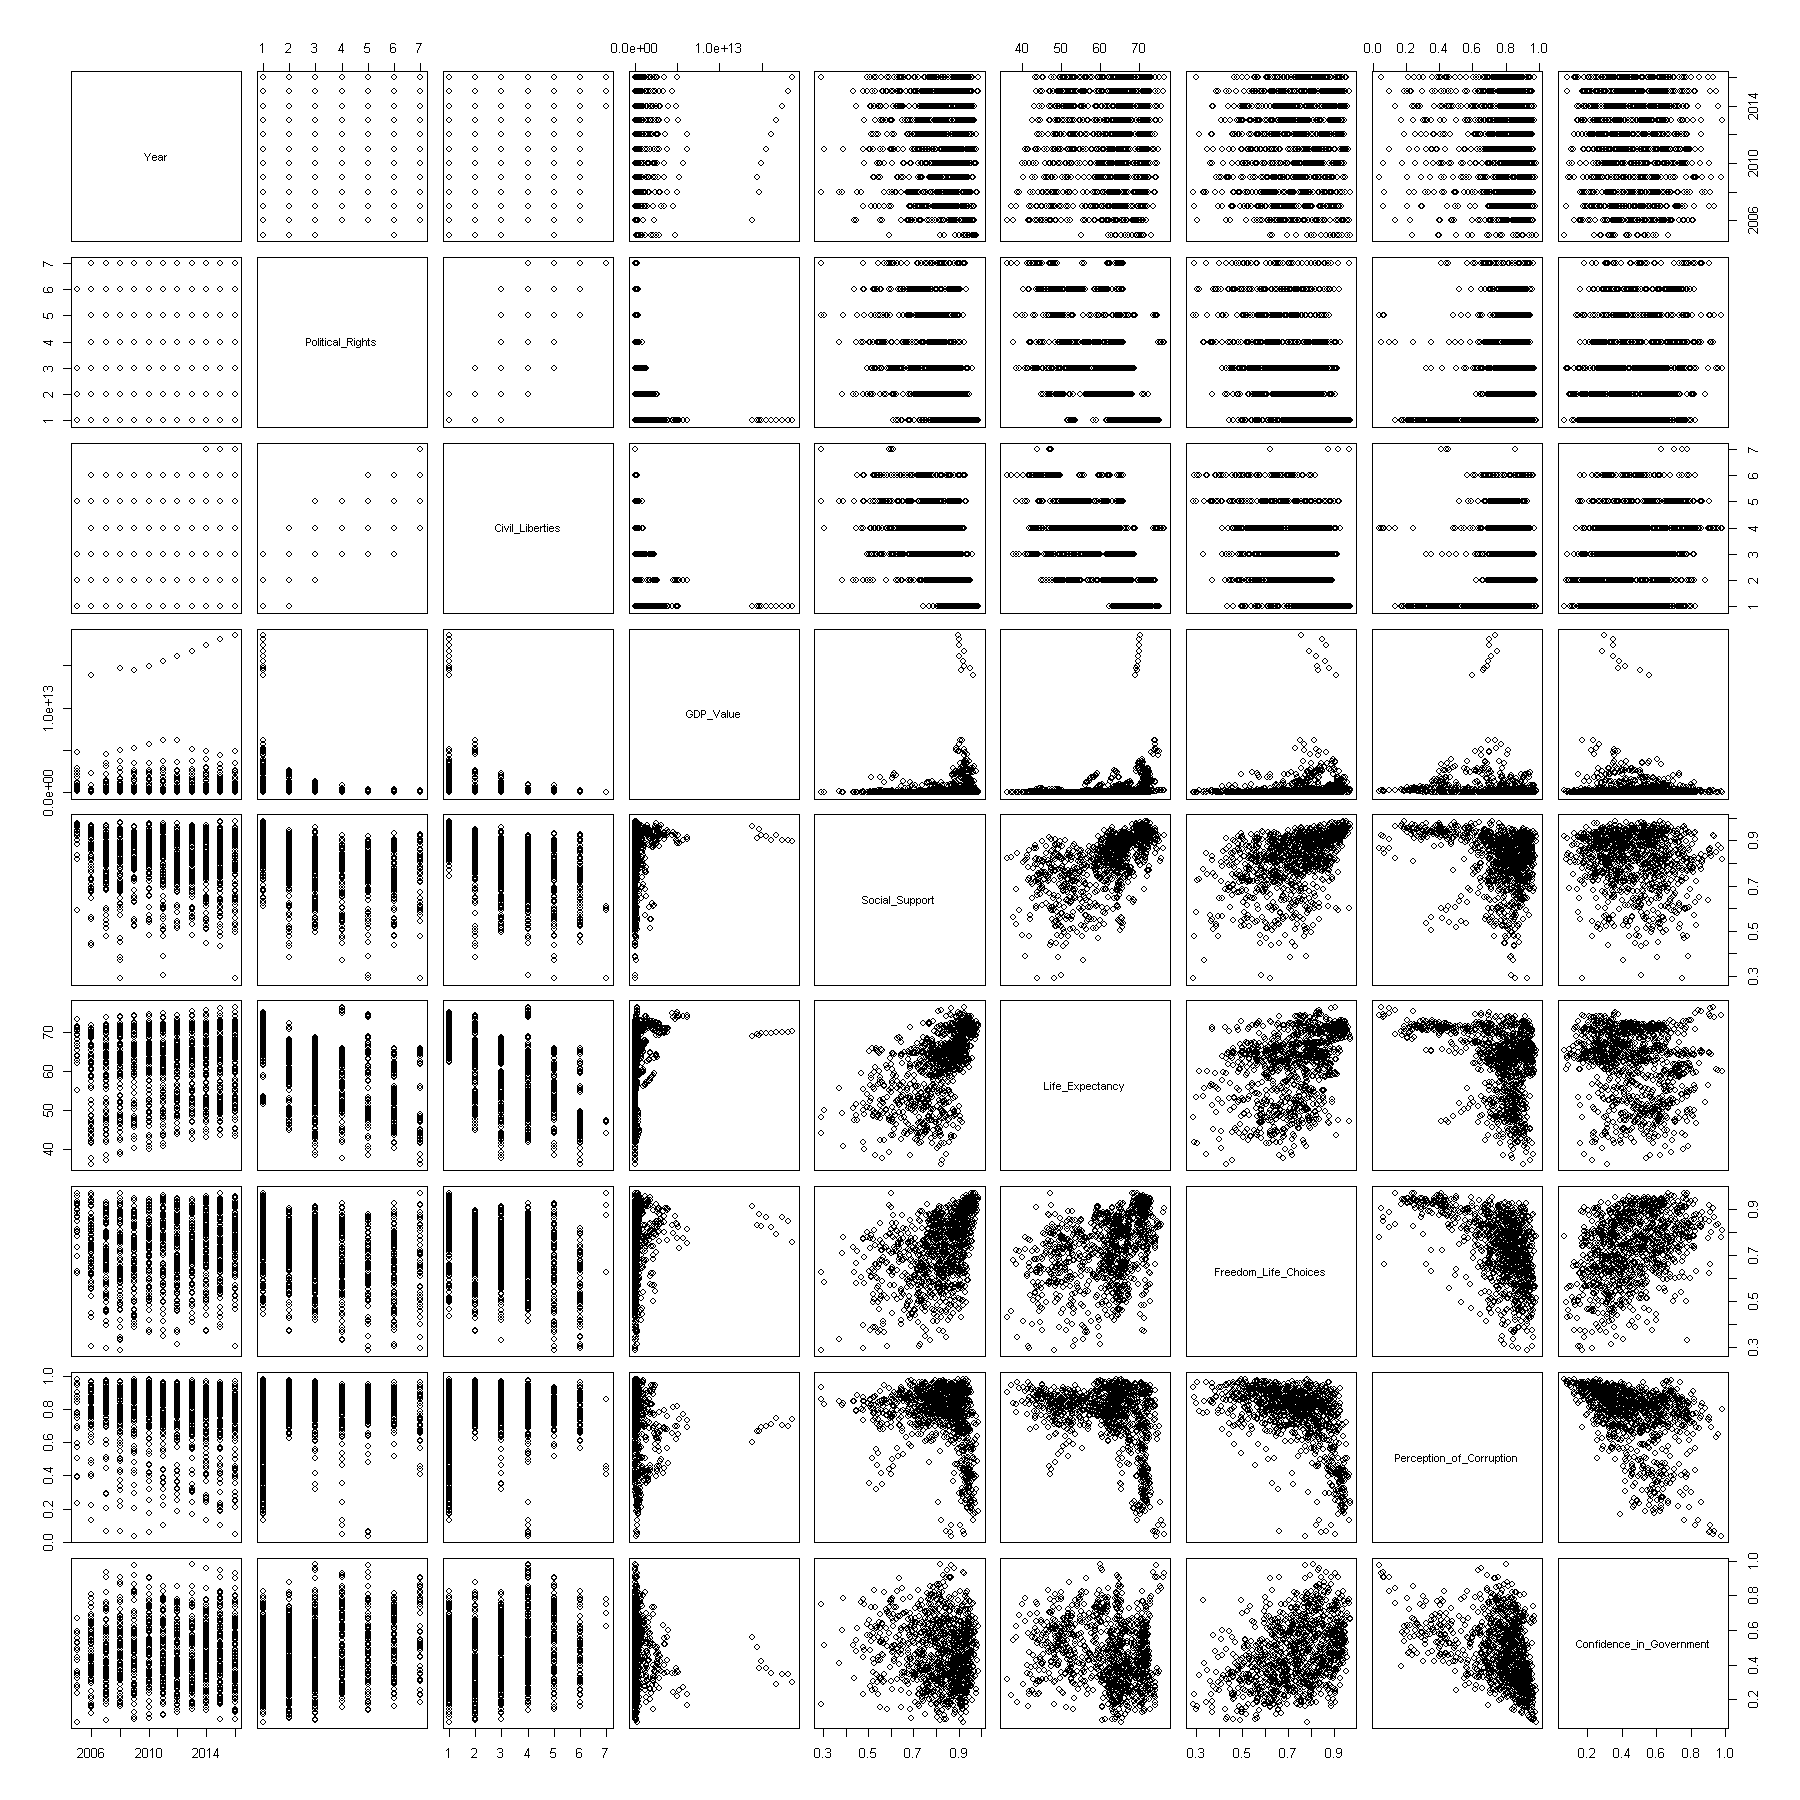

In [32]:
options(repr.plot.width=15, repr.plot.height=15)
plot(cleaned_df[,c("Year", "Political_Rights", "Civil_Liberties", "GDP_Value", "Social_Support", "Life_Expectancy",
                   "Freedom_Life_Choices", "Perception_of_Corruption", "Confidence_in_Government")])

<p style="font-family: Lucida Grande; font-size: 20px;">Below seperate plots are created for each of the initially noted correlations in the dataset. From these 7 plots we can in fact confirm the presence of moderate to strong correlation between the related features. These will become the bases of the <b>Big Idea</b> discussed in the accompanying report.<p>

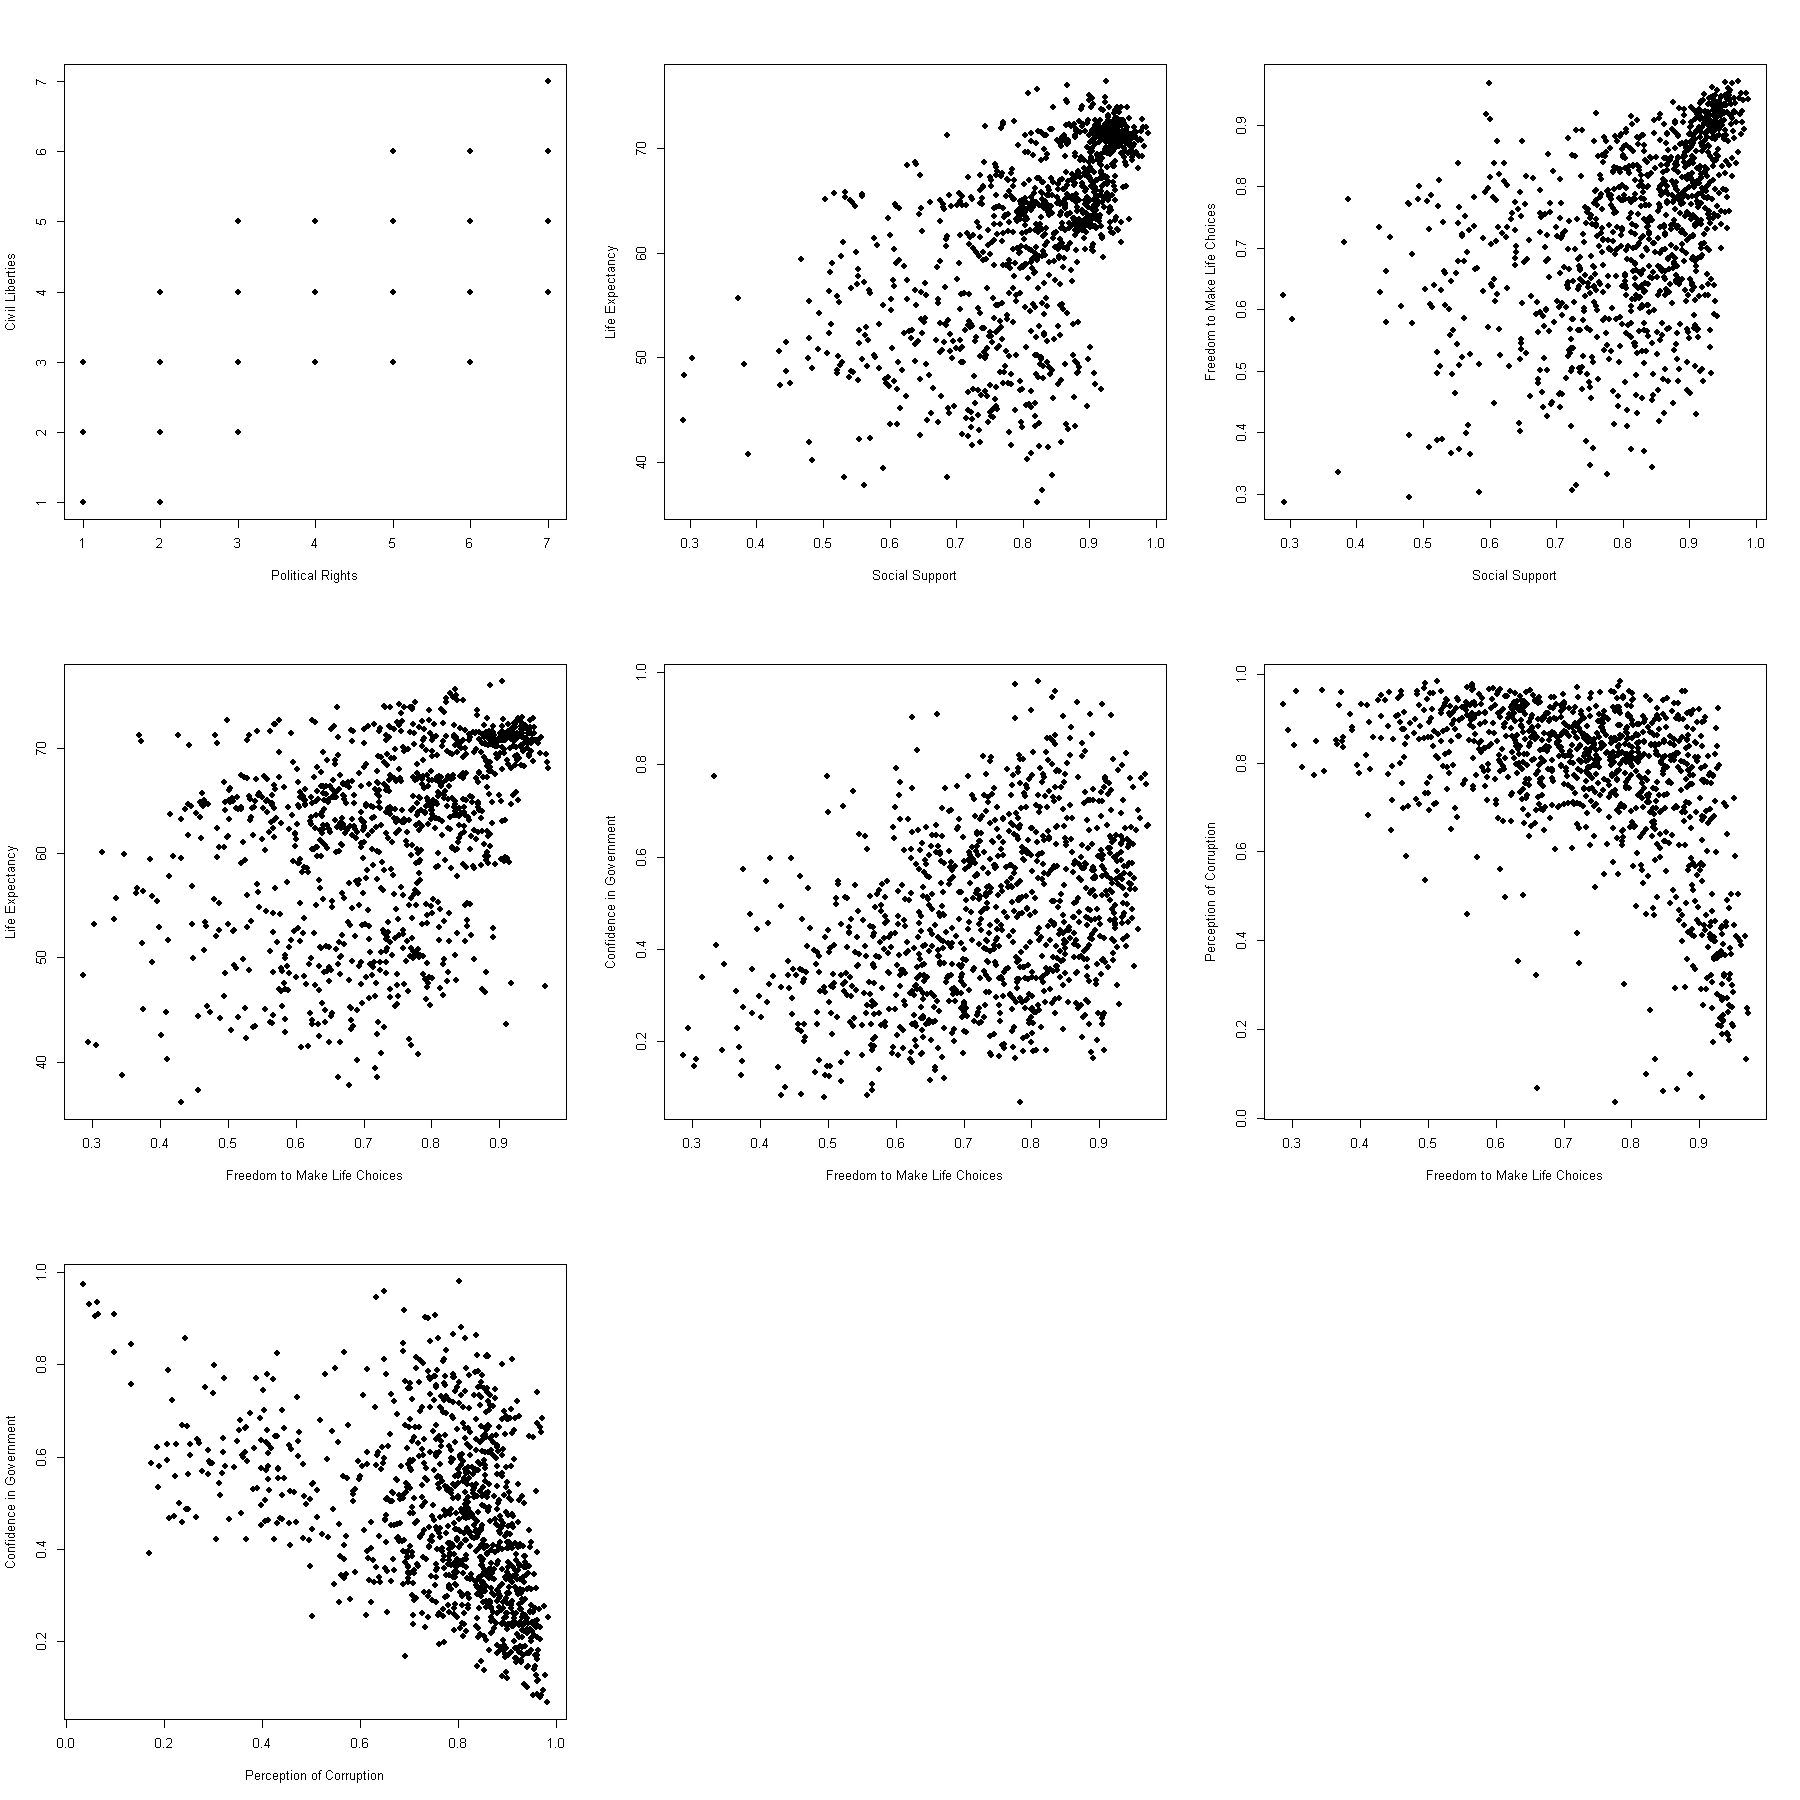

In [33]:
par(mfrow=c(3,3))
plot(cleaned_df$Political_Rights, cleaned_df$Civil_Liberties, xlab="Political Rights",ylab="Civil Liberties",pch=19) 
plot(cleaned_df$Social_Support, cleaned_df$Life_Expectancy, xlab="Social Support",ylab="Life Expectancy",pch=19) 
plot(cleaned_df$Social_Support, cleaned_df$Freedom_Life_Choices, xlab="Social Support",ylab="Freedom to Make Life Choices",pch=19)
plot(cleaned_df$Freedom_Life_Choices, cleaned_df$Life_Expectancy, xlab="Freedom to Make Life Choices",ylab="Life Expectancy",pch=19) 
plot(cleaned_df$Freedom_Life_Choices, cleaned_df$Confidence_in_Government, xlab="Freedom to Make Life Choices",ylab="Confidence in Government",pch=19) 
plot(cleaned_df$Freedom_Life_Choices, cleaned_df$Perception_of_Corruption, xlab="Freedom to Make Life Choices",ylab="Perception of Corruption",pch=19) 
plot(cleaned_df$Perception_of_Corruption, cleaned_df$Confidence_in_Government, xlab="Perception of Corruption",ylab="Confidence in Government",pch=19) 


In [34]:
write.csv(cleaned_df,"../Data/cleaned_df.csv", row.names = FALSE)